In [236]:
#import libraries

import pandas as pd
import numpy as np
import regex as re
from datetime import datetime, timedelta
from cmath import nan
import matplotlib.pyplot as plt
import seaborn as sns


In [213]:
# notebook settings 

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)
settings :  { "notebook.output.textLineLimit": 9999 }

In [214]:
# load data 

df = pd.read_csv('ufc-master.csv')

In [215]:
#describe

df.describe()

,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,finish_round,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
count,4895.000000,4896.000000,4895.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,3966.000000,4131.000000,4064.000000,4063.000000,4054.000000,4896.00000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4441.000000,4539.000000,4539.000000,4539.000000,4529.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.0,877.000000,1328.000000,59.000000,7.0,104.000000,118.000000,142.000000,141.000000,134.000000,140.000000,139.000000,133.000000,137.000000,142.000000,166.000000,44.000000,0.0,61.000000,78.000000,110.000000,93.000000,102.000000,89.000000,87.000000,90.000000,85.000000,95.000000,35.000000,4274.000000,4274.000000,4093.000000,4077.000000,3847.000000,3835.000000,3847.000000,3834.000000
mean,-117.640449,66.030637,94.827397,167.083323,3.181985,0.477941,0.875408,0.010621,26.308553,0.444741,0.504614,1.251173,0.312506,1.76491,1.726511,10.742443,0.232639,0.014502,0.260417,0.975490,0.960989,0.588848,0.029616,2.880923,178.084669,182.435958,164.803105,0.613154,1.051062,0.013480,27.396408,0.454709,0.517659,1.337388,0.329411,2.530842,2.393587,15.950980,0.552083,0.025735,0.365809,1.468750,1.449551,0.866422,0.047386,4.293709,178.030948,182.619835,165.253472,30.056985,29.518382,0.105392,-0.175449,-0.765931,-1.412786,0.370507,-5.208538,-0.319444,-0.506332,-0.277574,0.018591,-0.251172,0.329044,-3.539160,-0.061050,-0.201570,0.138480,1.0,8.262258,6.834337,6.677966,0.0,6.826923,7.050847,6.774648,6.673759,7.649254,6.807143,7.093525,6.827068,6.985401,6.457746,6.789157,7.795455,NaN,7.803279,8.192308,8.490909,8.268817,8.745098,8.179775,8.126437,8.022222,8.388235,8.473684,9.485714,2.408049,652.313758,294.064745,416.544027,843.010138,1064.543155,514.231869,647.257173
std,268.881452,247.803928,82.843409,136.944

In [216]:
# turn into datetime and sort

df[['date']] = df[['date']].apply(pd.to_datetime)

df.sort_values(by=['date'], inplace=True)

In [217]:
df.sort_values(by=['date'], inplace=True)

In [218]:
df.nunique()

R_fighter                       1348
B_fighter                       1591
R_odds                           328
B_odds                           340
R_ev                             330
B_ev                             345
date                             428
location                         145
country                           28
Winner                             2
title_bout                         2
weight_class                      13
gender                             2
no_of_rounds                       3
B_current_lose_streak              7
B_current_win_streak              12
B_draw                             3
B_avg_SIG_STR_landed            1566
B_avg_SIG_STR_pct                977
B_avg_SUB_ATT                    245
B_avg_TD_landed                  611
B_avg_TD_pct                     939
B_longest_win_streak              16
B_losses                          16
B_total_rounds_fought             83
B_total_title_bouts               16
B_win_by_Decision_Majority         3
B

In [219]:
# null counts

df.isnull().sum()

R_fighter                          0
B_fighter                          0
R_odds                             1
B_odds                             0
R_ev                               1
B_ev                               0
date                               0
location                           0
country                            0
Winner                             0
title_bout                         0
weight_class                       0
gender                             0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_SIG_STR_landed             930
B_avg_SIG_STR_pct                765
B_avg_SUB_ATT                    832
B_avg_TD_landed                  833
B_avg_TD_pct                     842
B_longest_win_streak               0
B_losses                           0
B_total_rounds_fought              0
B_total_title_bouts                0
B_win_by_Decision_Majority         0
B

In [220]:
#df=data copy

data=df.copy()



### Getting rid of bad data

In [221]:
# doctor stoppage is when a fight is dropped due to an unforseen medical issue .ie a broken leg. 
# Usually this cannot be predicted and ruins the data so I am getting rid of it

df = df[ df.B_win_by_TKO_Doctor_Stoppage == 0]
df = df[ df.R_win_by_TKO_Doctor_Stoppage == 0]

In [222]:
# we see the counts for the types of finishes

df[['finish','r_ko_odds']].groupby('finish').count()

,r_ko_odds
finish,
DQ,8
KO/TKO,1115
M-DEC,25
Overturned,2
S-DEC,363
SUB,601
U-DEC,1314


In [223]:
# dropping the disqualified and overturned rounds because that is not fair and ruins the data

df = df[df.finish != 'Overturned']

df = df[df.finish != 'DQ']

### Feature engineering

In [224]:
from cmath import nan

# create funnction that encodes better rank as a variable
# not sure if I should ohe or ordinally encode this, but I one-hot-encoded the data set Winner red becomes 1 and blue is 0 so it makes sense that better_rank red is 2
def encoder(x):
    if x == 'Blue':
        return 1
    elif x == 'Red':
        return 2
    elif x == 'neither':
        return 0
    else:
        return nan
    
# create new column
df['encoded_better_rank']=[encoder(x) for x in df['better_rank']]

In [225]:
# check for nulls

df[['encoded_better_rank']].isnull().sum()

encoded_better_rank    0
dtype: int64

In [226]:
# Feature Engineering create difference

# weight
df['weight_diff']=df['R_Weight_lbs'] - df['B_Weight_lbs']

# for betting odds most of the time it's combined
df['win_by_decision_diff'] = df['R_win_by_Decision_Majority'] + df['R_win_by_Decision_Split'] + df['R_win_by_Decision_Unanimous'] - df['B_win_by_Decision_Majority'] - df['B_win_by_Decision_Split'] - df['B_win_by_Decision_Unanimous'] 

In [227]:
# null counts

df.isnull().sum()

R_fighter                 0
B_fighter                 0
R_odds                    1
B_odds                    0
R_ev                      1
                       ... 
r_ko_odds               950
b_ko_odds               963
encoded_better_rank       0
weight_diff               0
win_by_decision_diff      0
Length: 122, dtype: int64

In [228]:
# create wins losses percent feature

#Blue

df['B_fights_fought'] = df['B_losses']+df['B_wins']+df['B_draw']

df['B_win_percent']=(round(df['B_wins']/df['B_fights_fought'])).fillna(0)

df['B_loss_percent']=round(df['B_losses']/df['B_fights_fought']).fillna(0)

# Red

df['R_fights_fought'] = (df['R_losses']+df['R_wins']+df['R_draw'])

df['R_win_percent']=round(df['R_wins']/df['R_fights_fought']).fillna(0)

df['R_loss_percent']=round(df['R_losses']/df['R_fights_fought']).fillna(0)

# diff

df['diff_wins+percent'] = df['R_win_percent'] - df['B_win_percent']

df['diff_loss_percent'] =df['R_loss_percent'] - df['B_loss_percent']

df['diff_fights_fought'] =df['R_fights_fought'] - df['B_fights_fought']



In [238]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_odds', 'B_odds', 'R_ev', 'B_ev', 'Winner',
       'title_bout', 'weight_class', 'gender', 'B_Stance', 'R_Stance',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'B_match_weightclass_rank', 'R_match_weightclass_rank', 'better_rank',
       'finish', 'finish_round', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds', 'encoded_better_rank',
       'weight_diff', 'win_by_decision_diff', 'B_fights_fought',
       'B_win_percent', 'B_loss_percent', 'R_fights_fought', 'R_win_percent',
       'R_loss_percent', 'diff_wins+percent', 'diff_loss_percent',
       'diff_fights_fought', 'days from current date'],
      dtype='object')

In [229]:
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,encoded_better_rank,weight_diff,win_by_decision_diff,B_fights_fought,B_win_percent,B_loss_percent,R_fights_fought,R_win_percent,R_loss_percent,diff_wins+percent,diff_loss_percent,diff_fights_fought
4895,Eric Schafer,Jason Brilz,140.0,-160,140.000000,62.500000,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Light Heavyweight,MALE,3,1,0,0,31.666667,0.4600,0.666667,1.666667,0.500,2,1,8,0,0,0,1,1,0,0,2,Orthodox,180.34,180.34,205,1,0,0,15.666667,0.588333,1.333333,0.833333,0.145000,2,3,9,0,0,0,0,1,2,0,3,Orthodox,190.50,190.50,185,32,34,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-20,-1,3,1.0,0.0,6,0.0,0.0,-1.0,0.0,3
4885,Brandon Vera,Jon Jones,215.0,-235,215.000000,42.553191,2010-03-21,"Broomfield, Colorado, USA",USA,Blue,False,Light Heavyweight,MALE,3,1,0,0,39.000000,0.4775,0.250000,2.500000,0.525,3,1,9,0,0,0,2,0,1,0,3,Orthodox,193.04,213.36,205,1,0,0,30.727273,0.572727,0.090909,0.545455,0.363636,4,4,23,0,0,0,2,4,1,0,7,Orthodox,190.50,193.04,230,32,22,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Elbow,1.0,3:19,199.0,NaN,NaN,NaN,NaN,NaN,NaN,0,25,0,4,1.0,0.0,11,1.0,0.0,0.0,0.0,7
4886,Junior Dos Santos,Gabriel Gonzaga,-250.0,230,40.000000,230.000000,2010-03-21,"Broomfield, Colorado, USA",USA,Red,False,Heavyweight,MALE,3,0,1,0,13.700000,0.5480,0.700000,1.200000,0.572,4,3,16,1,0,0,0,5,2,0,7,Orthodox,187.96,193.04,242,0,4,0,25.750000,0.537500,0.000000,0.000000,0.000000,4,0,6,0,0,0,0,4,0,0,4,Orthodox,193.04,195.58,238,26,30,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Punches,1.0,3:53,233.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-4,0,10,1.0,0.0,4,1.0,0.0,0.0,

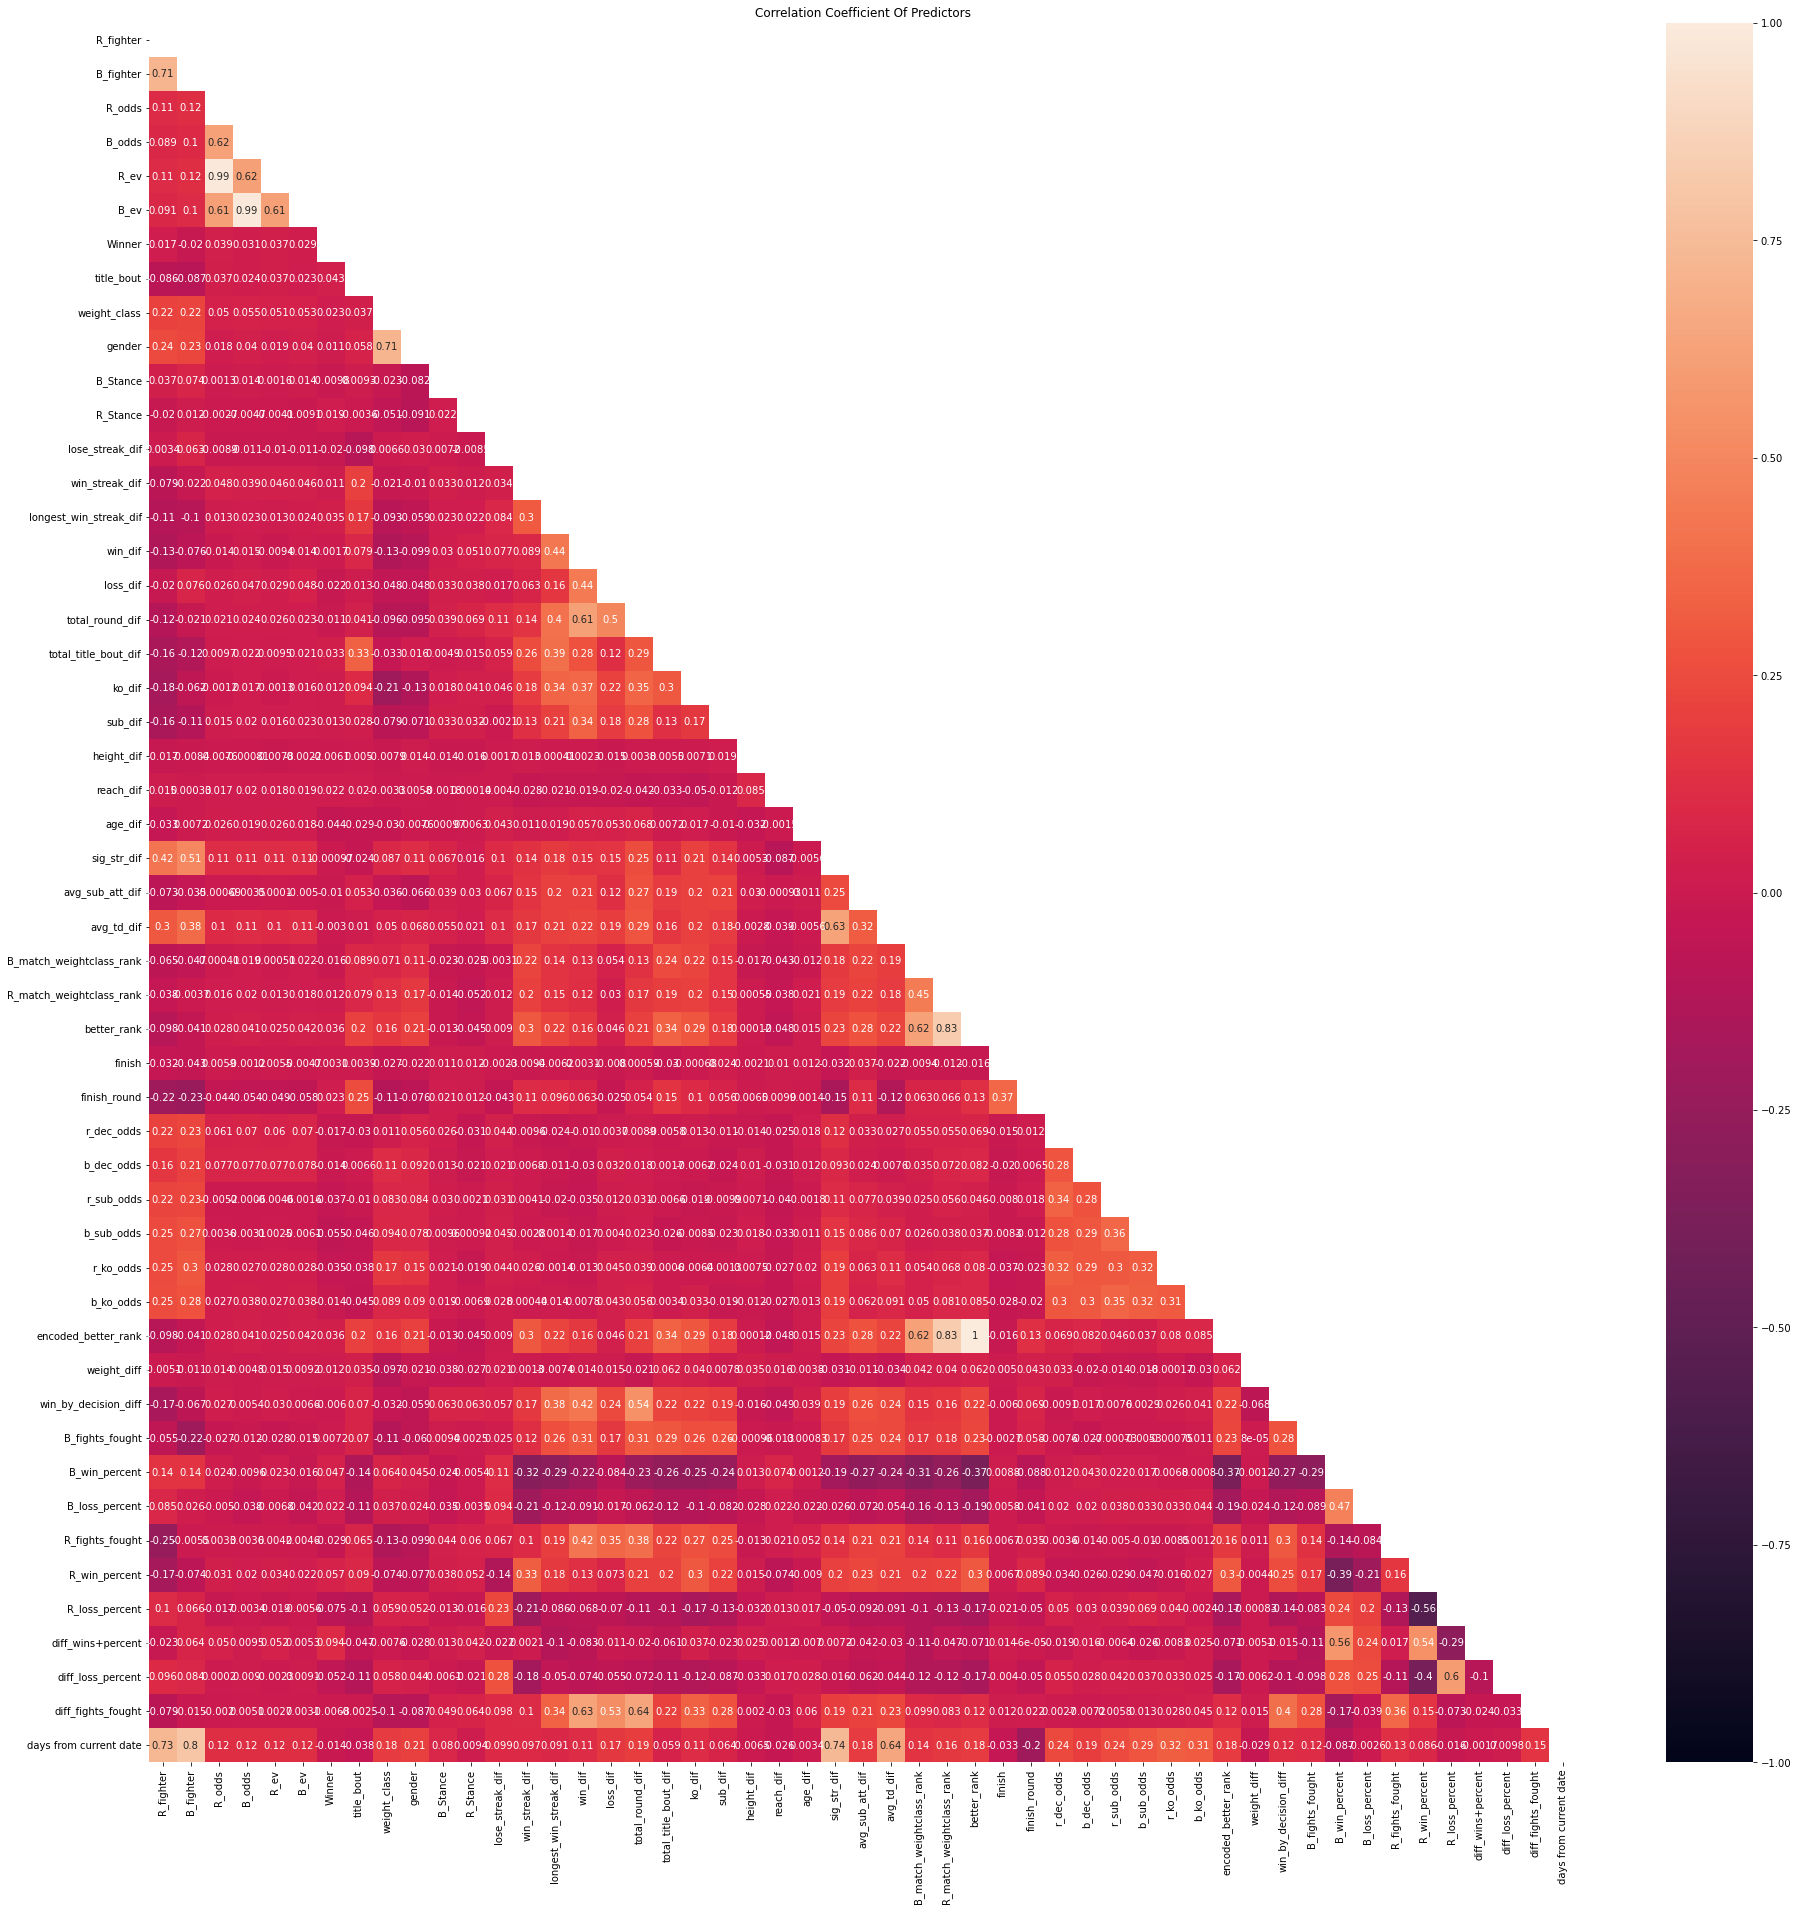

In [237]:
# correlation

# set figure size
plt.figure(figsize=(32,32))

# generate correlation
# use .factorize() to turn categorical variables into numeric in order to properly perform it

correlation = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# generate heatmap
sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1)

#sns.heatmap(correlation, annot=True, vmin=-1, vmax=1) # without mask it shows the whole thing

plt.title('Correlation Coefficient Of Predictors')
plt.show()

### Dropping unnecessary columns

In [230]:
# dropping these because there are already feature engineered differences

# b_fighters
to_drop_b=['B_Pound-for-Pound_rank','B_win_by_TKO_Doctor_Stoppage','B_win_by_Decision_Unanimous',
           'B_win_by_Decision_Split','B_win_by_Decision_Majority','B_age','B_Weight_lbs','B_losses','B_wins','B_win_by_Submission',
           'B_win_by_KO/TKO','B_total_title_bouts','B_total_rounds_fought','B_longest_win_streak',
           'B_draw','B_avg_SIG_STR_pct','B_avg_SIG_STR_landed','B_avg_SUB_ATT','B_avg_TD_pct',
           'B_avg_TD_landed','B_Height_cms','B_Reach_cms','B_current_lose_streak','B_current_win_streak',
           "B_Women's Flyweight_rank", "B_Women's Featherweight_rank", "B_Women's Strawweight_rank", "B_Women's Bantamweight_rank", 
           'B_Heavyweight_rank', 'B_Light Heavyweight_rank', 'B_Middleweight_rank', 'B_Welterweight_rank', 'B_Lightweight_rank', 
           'B_Featherweight_rank', 'B_Bantamweight_rank', 'B_Flyweight_rank']

# unrelated to fighters
to_drop=['constant_1','location','country','no_of_rounds','empty_arena','finish_details','finish_round_time','total_fight_time_secs']

#dropping R fighters
to_drop_r= [re.sub(r'^.', 'R', s).strip() for s in to_drop_b]

# drop
df.drop(to_drop_b, axis=1, inplace=True)

df.drop(to_drop_r, axis=1, inplace=True)

df.drop(to_drop, axis=1, inplace=True)



In [231]:
df.describe()

,R_odds,B_odds,R_ev,B_ev,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_match_weightclass_rank,R_match_weightclass_rank,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,encoded_better_rank,weight_diff,win_by_decision_diff,B_fights_fought,B_win_percent,B_loss_percent,R_fights_fought,R_win_percent,R_loss_percent,diff_wins+percent,diff_loss_percent,diff_fights_fought
count,4538.000000,4539.000000,4538.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,790.000000,1202.000000,3927.000000,3821.000000,3808.000000,3589.000000,3577.000000,3589.000000,3576.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000
mean,-117.605553,65.640229,94.601874,166.547600,0.097158,-0.184622,-0.752368,-1.368804,0.337960,-5.088125,-0.274289,-0.468826,-0.270104,0.021172,-0.262412,0.298965,-3.694229,-0.063034,-0.210209,8.336709,6.922629,2.414057,294.095001,414.601103,836.545277,1055.214425,517.899136,652.522092,0.532716,0.437762,0.608724,4.298083,0.459132,0.208196,6.324741,0.604538,0.171403,0.145406,-0.036792,2.026658
std,267.862385,246.955440,82.452264,136.364516,0.979309,1.682571,1.995680,3.904903,2.744744,16.439217,1.492120,1.944035,1.730323,7.040320,9.505267,5.185567,22.606399,0.867129,1.721720,4.240315,4.646523,0.991398,230.361088,304.652550,548.162720,626.734296,413.558169,460.338676,0.875439,9.501910,2.214435,5.095900,0.498382,0.406062,6.149585,0.489003,0.376903,0.545431,0.494317,6.162372
min,-1700.000000,-1200.000000,5.882353,8.333333,-5.000000,-13.000000,-12.000000,-28.000000,-18.000000,-448.000000,-14.000000,-21.000000,-13.000000,-187.960000,-187.960000,-17.000000,-118.000000,-8.300000,-11.000000,1.000000,0.000000,1.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000,0.000000,-75.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-27.000000
25%,-250.000000,-145.000000,40.000000,68.965517,0.000000,-1.000000,-2.000000,-3.000000,-1.000000,-11.000000,0.000000,-1.000000,-1.000000,-5.080000,-5.080000,-3.000000,-14.636243,-0.440000,-1.000000,5.000000,3.000000,1.000000,167.000000,225.000000,430.000000,585.000000,242.000000,325.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,-150.000000,130.000000,66.666667,130.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.750000,0.000000,0.000000,9.000000,7.000000,3.000000,250.000000,347.500000,701.000000,950.000000,439.000000,550.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,125.000000,220.000000,125.000000,220.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,5.080000,5.080000,4.000000,4.012987,0.237424,0.600000,12.000000,11.000000,3.000000,395.000000,525.000000,1190.000000,1400.000000,700.000000,900.000000,2.000000,0.000000,1.000000,6.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,5.000000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,9.000000,14.000000,23.000000,16.000000,80.000000,14.000000,14.000000,10.000000,30.480000,30.480000,17.000000,128.222222,6.000000,10.860000,15.000000,15.000000,5.000000,2200.000000,2600.000000,4665.000000,4785.000000,2675.000000,3200.000000,2.000000,80.000000,12.000000,43.000000,1.000000,1.000000,48.000000,1.000000,1.000000,1.000000,1.000000,43.000000


In [232]:
df.isnull().sum()

# Null - value turns it into a zero might have to drop those first so i might need to drop the nullvalues before hand??
# not sure how i should handle it as i may not need to drop them later on depending on the algorithm that i use


R_fighter                      0
B_fighter                      0
R_odds                         1
B_odds                         0
R_ev                           1
B_ev                           0
date                           0
Winner                         0
title_bout                     0
weight_class                   0
gender                         0
B_Stance                       2
R_Stance                       0
lose_streak_dif                0
win_streak_dif                 0
longest_win_streak_dif         0
win_dif                        0
loss_dif                       0
total_round_dif                0
total_title_bout_dif           0
ko_dif                         0
sub_dif                        0
height_dif                     0
reach_dif                      0
age_dif                        0
sig_str_dif                    0
avg_sub_att_dif                0
avg_td_dif                     0
B_match_weightclass_rank    3749
R_match_weightclass_rank    3337
better_ran

### datetime and time deltas

In [233]:
df['date'] =pd.to_datetime(df['date'])


#turn datetime into object that the models can use
df['days from current date']=datetime.now()-df['date']

df['days from current date']=df['days from current date'].apply(lambda x: x.days)


#drop date
df = df.drop(['date'], axis=1, errors='ignore')

In [234]:
df # how our dataset looks like

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,gender,B_Stance,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_match_weightclass_rank,R_match_weightclass_rank,better_rank,finish,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,encoded_better_rank,weight_diff,win_by_decision_diff,B_fights_fought,B_win_percent,B_loss_percent,R_fights_fought,R_win_percent,R_loss_percent,diff_wins+percent,diff_loss_percent,diff_fights_fought,days from current date
4895,Eric Schafer,Jason Brilz,140.0,-160,140.000000,62.500000,Blue,False,Light Heavyweight,MALE,Orthodox,Orthodox,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,NaN,NaN,neither,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-20,-1,3,1.0,0.0,6,0.0,0.0,-1.0,0.0,3,4581
4885,Brandon Vera,Jon Jones,215.0,-235,215.000000,42.553191,Blue,False,Light Heavyweight,MALE,Orthodox,Orthodox,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,NaN,NaN,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,25,0,4,1.0,0.0,11,1.0,0.0,0.0,0.0,7,4581
4886,Junior Dos Santos,Gabriel Gonzaga,-250.0,230,40.000000,230.000000,Red,False,Heavyweight,MALE,Orthodox,Orthodox,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,NaN,NaN,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-4,0,10,1.0,0.0,4,1.0,0.0,0.0,0.0,-6,4581
4888,Alessio Sakara,James Irvin,-120.0,100,83.333333,100.000000,Red,False,Middleweight,MALE,Orthodox,Orthodox,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,NaN,NaN,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-20,2,8,0.0,0.0,10,0.0,0.0,0.0,0.0,2,4581
4894,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,Red,False,Welterweight,MALE,Orthodox,Orthodox,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,NaN,NaN,neither,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,4581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,Blue,False,Middleweight,MALE,Southpaw,Orthodox,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.850000,-1.600000,-3.330000,NaN,NaN,neither,S-DEC,3.0,550.0,275.0,275.0,1400.0,600.0,185.0,0,20,-8,14,1.0,0.0,10,1.0,0.0,0.0,0.0,-4,368
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,Blue,False,Welterweight,MALE,Orthodox,Orthodox,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.190000,0.300000,-1.480000,NaN,NaN,neither,U-DEC,3.0,450.0,350.0,700.0,1100.0,550.0,120.0,0,0,4,11,1.0,0.0,19,1.0,0.0,0.0,0.0,8,368
5,Antonina Shevchenko,Casey O'Neill,215.0,-265,215.000000,37.735849,Blue,False,Women's Flyweight,FEMALE,Orthodox,Southpaw,-1,2,0,-2,-3,-12,0,-1,0,-5.08,5.08,-13,1.590000,0.900000,3.320000,NaN,NaN,neither,KO/TKO,2.0,300.0,200.0,1600.0,330.0,1000.0,300.0,0,0,1,2,1.0,0.0,7,1.0,0.0,0.0,0.0,5,368
7,Devonte Smith,Jamie Mullarkey,-155.0,135,64.516129,135.000000,Blue,False,Lightweight,MALE,Orthodox,Orthodox,0,0,-2,-3,1,1,0,-3,0,7.62,-5.08,-1,-2.070000,-0.100000,2.970000,NaN,NaN,neither,KO/TKO,2.0,330.0,450.0,2000.0,900.0,140.0,330.0,0,0,0,3,0.0,1.0,5,1.0,0.0,1.0,-1.0,2,368


In [235]:
df.to_csv('pre-processed_new.csv', index=False)